# Aviatrix Analytics Assignment

## Introduction and Load Data

Aviatrix is an online casino game. \
The player chooses how much to bet on landing a plane before it explodes. \
The plane is a customizable NFT. \
The plane collects experience and levels after every round.

This analysis will be composed of the follwoing stages:
- identification and description of data
- brief report with metrics that I consider most useful for description
- assessment of user engagment
- request amd recommendation for additional fields/events

In [20]:
import pandas as pd
import seaborn as sns
from pandas.tseries.offsets import Week

import numpy as np
import matplotlib.pyplot as plt

Below, we can see the data loaded from a csv file on the bets made in Aviatrix. \
Lets make an assumption that the column Currency represents the corresponding timezone or in other words country.

In [21]:
df = pd.read_csv('test_data.csv', parse_dates=['CreatedAt'])
df

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur
0,2023-03-20 15:01:13.304718058,KZT,wqsjm3ggga,platform_2,1013616,203.29,0.41,0.00,0.00
1,2023-03-13 13:40:07.304718058,TRY,enrlnd1u6y,platform_4,982714,1.88,0.09,5.79,0.29
2,2023-03-22 00:39:12.304718058,KZT,5nz03e471b,platform_1,1019784,605.22,1.21,0.00,0.00
3,2023-03-22 06:14:56.304718058,KZT,fiatnpu27d,platform_2,1020804,33.99,0.07,0.00,0.00
4,2023-03-01 14:32:41.304718058,KZT,1zx0tpf58u,platform_1,930347,18.93,0.04,0.00,0.00
...,...,...,...,...,...,...,...,...,...
99984,2023-03-27 05:50:36.304718058,KZT,yy04sqqhsn,platform_2,1042809,73.09,0.15,73.09,0.15
99985,2023-04-05 14:17:12.304718058,TRY,w86x6fnbx5,platform_2,1083864,5.73,0.27,0.00,0.00
99986,2023-03-11 19:34:34.304718058,KZT,w87kmjmmuc,platform_3,975059,26.22,0.05,0.00,0.00
99987,2023-03-31 21:33:30.304718058,KZT,bkwmgy6e6b,platform_1,1063176,88.01,0.18,0.00,0.00


## Identification and description of errors in the data

Types of data seem to be consistent with what they represent.

In [22]:
df.dtypes

CreatedAt         datetime64[ns]
Currency                  object
UserId                    object
PlatformId                object
MatchId                    int64
stake_currency           float64
stake_eur                float64
won_currency             float64
won_eur                  float64
dtype: object

From the very start we can see that the platform column registers platforms as listed below. \
This is not fitting for a good analysis, because the names for platforms are not descriptive enough.

In [23]:
df['PlatformId'].unique()

array(['platform_2', 'platform_4', 'platform_1', 'platform_3'],
      dtype=object)

Lets try to see if there are any missing values in data. \
There is no missing data in the dataframe.

In [24]:
df[df.isna().any(axis=1)]

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur


There are also no duplicate entries.

In [25]:
df[df.duplicated()]

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur


The currencies seem to fit to the world definitions:
- KZT - Kazakhstan tenge
- TRY - TUrkey lire
- AZN - Azerbaijani manat
- INR - Indian rupee

In [26]:
df.Currency.unique()

array(['KZT', 'TRY', 'AZN', 'INR'], dtype=object)

There are no negative or zero values in the colummn MatchId.

In [27]:
df.query("MatchId <= 0")

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur


There are 2 rows that show stake currency being zero, which is an error because a bet cannot be zero.

In [28]:
df.query("stake_currency <= 0")

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur
5237,2023-03-10 19:18:40.304718058,AZN,0gdqrqabxe,platform_3,970695,0.0,0.0,0.00,0.0
87516,2023-04-01 07:08:16.304718058,AZN,pra6xdwjfs,platform_3,1064955,0.0,0.0,0.01,0.0


There are 262 rows that show stake euro to be zero. \
This is possible because a bet in a different currency can be lower than 1 cent euro.

In [29]:
df.query("stake_eur <= 0")

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur
777,2023-03-26 08:56:03.304718058,KZT,n9ker2uij0,platform_1,1038952,2.22,0.0,4.05,0.01
1301,2023-03-28 10:49:49.304718058,KZT,hqljaln82w,platform_1,1048103,2.20,0.0,0.00,0.00
1781,2023-02-26 12:20:18.304718058,KZT,5z9j6bp3ke,platform_3,917112,1.02,0.0,1.18,0.00
2089,2023-03-28 07:35:46.304718058,TRY,mww55mwkas,platform_3,1047526,0.08,0.0,0.08,0.00
2684,2023-03-20 05:49:15.304718058,KZT,t4au76z0un,platform_1,1011899,2.05,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...
98714,2023-03-05 11:46:57.304718058,KZT,86u9enqz6i,platform_1,947417,1.87,0.0,4.04,0.01
98791,2023-03-13 13:15:58.304718058,KZT,u3q5tv1xkf,platform_2,982637,1.70,0.0,1.98,0.00
99272,2023-03-14 21:28:59.304718058,TRY,vbycjxn3jv,platform_3,988571,0.05,0.0,0.14,0.01
99328,2023-03-27 02:20:10.304718058,KZT,lodhtrre41,platform_1,1042141,2.08,0.0,4.50,0.01


There are no negative values in columns euros won and currency won.

In [30]:
df.query("won_currency < 0 | won_eur < 0")

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur


There are no stakes that were larger than winnings.

In [31]:
df.query("stake_eur > won_eur & won_eur != 0")

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur


Errors found:
- platform names are not descriptive enough
- there are 2 cases of zero amount bet

Lets exclude rows that have zero amount bet.

In [32]:
df = df.query("stake_currency != 0")

## A Brief Report: Description Metrics

The following metrics would describe existing bets data in the most useful way:
- daily active users (DAU) - how many unique users made bets each day; DAU is essential for operations, strategic planning, and understanding the general health of the product
- stickiness in percentage (stickinesss_%) - DAU / WAU, how well users are retained over time; stickiness shows sustained user interest and retention
- average revenue per user (ARPU) - how much revenue user generates on average; using ARPU decisions about more effective monetization strategies can be made
- revenue - how much revenue is generated; revenue is vital to ensuring the game remains financial viable

In [59]:
df['dates'] = pd.to_datetime(df.CreatedAt).dt.date

min_date = pd.to_datetime(df.CreatedAt).min()
df['custom_weeks'] = np.floor((pd.to_datetime(df.CreatedAt) - min_date).dt.days / 7).astype(int)
df['custom_weeks'] = pd.to_datetime(min_date + pd.to_timedelta(df['custom_weeks'] * 7, unit='D')).dt.date

weekly_metrics = df.groupby(["custom_weeks"]) \
                    .agg(WAU=("UserId", "nunique")) \
                    .reset_index()

daily_metrics = df.groupby(["custom_weeks", "dates", "UserId"]) \
                    .agg(euros_bet=("stake_eur", "sum"),
                         euro_won=("won_eur", "sum")) \
                    .reset_index() \
                        .groupby(["custom_weeks", "dates"]) \
                        .agg(
                            DAU=("UserId", "nunique"),
                            ARPU=("euros_bet", "mean"),
                            euros_bet=("euros_bet", "sum"),
                            euro_won=("euro_won", "sum")
                        ) \
                        .reset_index()

daily_metrics['revenue'] = daily_metrics.euros_bet - daily_metrics.euro_won

daily_metrics.drop(['euros_bet', 'euro_won'], axis=1, inplace=True)

metrics_by_weeks = daily_metrics.merge(weekly_metrics, on='custom_weeks')

metrics_by_weeks['DAU'] = metrics_by_weeks.DAU.round().astype("int")
metrics_by_weeks['ARPU'] = metrics_by_weeks.ARPU.round(2)

metrics_by_weeks['stickiness_%'] = ((metrics_by_weeks.DAU / metrics_by_weeks.WAU) * 100).round(1)

move_WAU = metrics_by_weeks.pop('WAU')
metrics_by_weeks.insert(3, move_WAU.name, move_WAU)

move_stickiness = metrics_by_weeks.pop('stickiness_%')
metrics_by_weeks.insert(4, move_stickiness.name, move_stickiness)

metrics_by_weeks.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_11720\3782705351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dates'] = pd.to_datetime(df.CreatedAt).dt.date
C:\Users\User\AppData\Local\Temp\ipykernel_11720\3782705351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['custom_weeks'] = np.floor((pd.to_datetime(df.CreatedAt) - min_date).dt.days / 7).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_11720\3782705351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,custom_weeks,dates,DAU,WAU,stickiness_%,ARPU,revenue
0,2023-02-25,2023-02-25,1353,6387,21.2,2.26,734.56
1,2023-02-25,2023-02-26,1178,6387,18.4,3.13,417.12
2,2023-02-25,2023-02-27,1412,6387,22.1,2.78,1161.73
3,2023-02-25,2023-02-28,1570,6387,24.6,2.54,-80.04
4,2023-02-25,2023-03-01,1425,6387,22.3,2.67,608.26


In order for the changes in metrics with time be more evident, we can use week over week report. \
This report would let us see the difference to the same day of the week as the current day, to maintain periodicity. 

In [34]:
metrics_by_weeks['custom_weeks'] = pd.to_datetime(metrics_by_weeks.custom_weeks)
metrics_by_weeks = metrics_by_weeks.set_index(['custom_weeks', 'dates']).pct_change(7).reset_index()

metrics_by_weeks = metrics_by_weeks.drop('WAU', axis=1)

metrics_by_weeks.head(10)

,custom_weeks,dates,DAU,stickiness_%,ARPU,revenue
0,2023-02-25,2023-02-25,NaN,NaN,NaN,NaN
1,2023-02-25,2023-02-26,NaN,NaN,NaN,NaN
2,2023-02-25,2023-02-27,NaN,NaN,NaN,NaN
3,2023-02-25,2023-02-28,NaN,NaN,NaN,NaN
4,2023-02-25,2023-03-01,NaN,NaN,NaN,NaN
5,2023-02-25,2023-03-02,NaN,NaN,NaN,NaN
6,2023-02-25,2023-03-03,NaN,NaN,NaN,NaN
7,2023-03-04,2023-03-04,-0.065041,-0.018868,-0.084071,-0.143416
8,2023-03-04,2023-03-05,0.011036,0.065217,-0.319489,-0.313266
9,2023-03-04,2023-03-06,-0.023371,0.027149,0.187050,0.159386


From the graphs, we can see the dynamics of metrics. \
ARPU seems to show slight rise but other wise is stable. \
There is a rise towards the middle of March and then a sudden drop on 23rd of March in DAU, stickiness, and revenue. \
Then, these metrics begin to rise again.

What happened in the middle of March? \
There is a Muslim celebration called Nauryz, which starts on 21st of March and varies in the continuation depending on the country. \
Since Azerbaijan, Kazakhstan, and Trukey are largely Muslim countries, so we can state that there is clear effect on gambling.

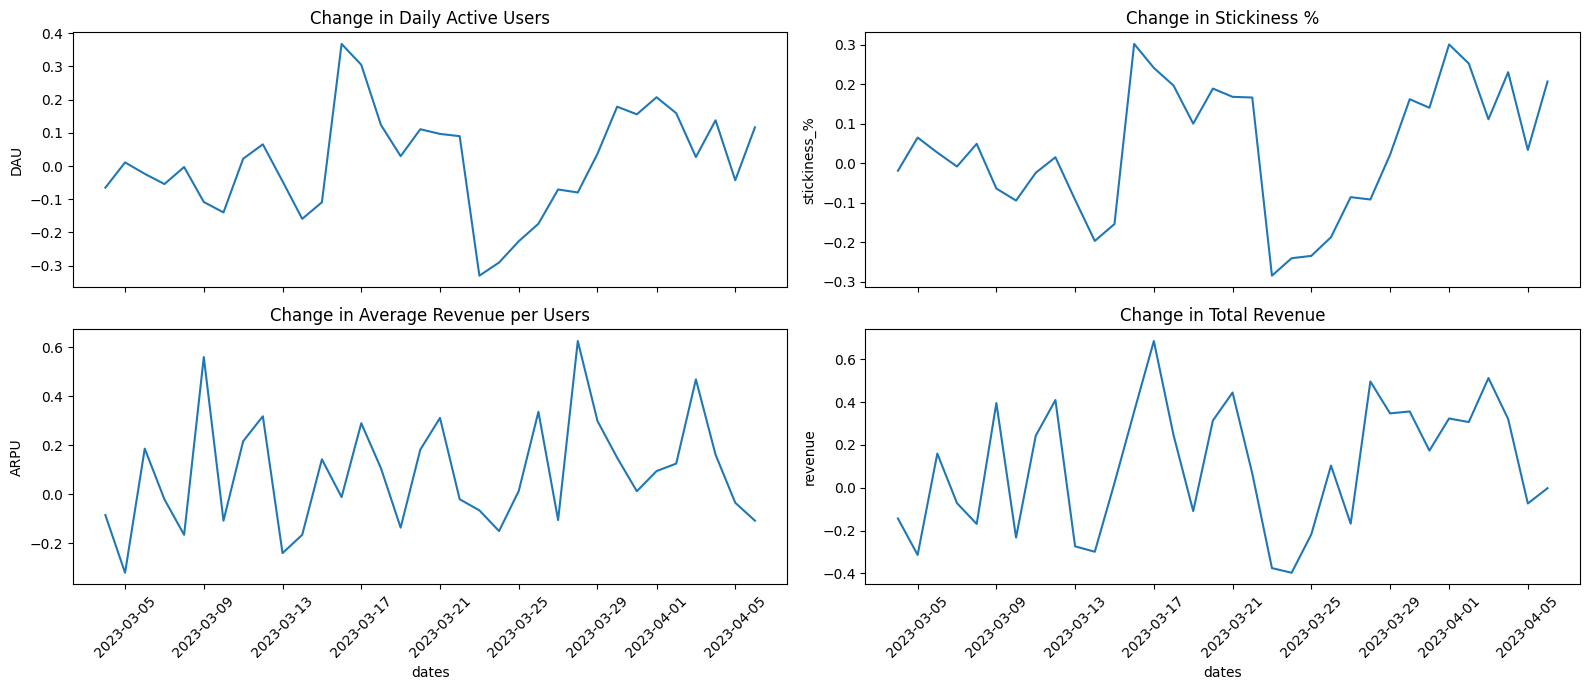

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(16, 7), sharex=True)

sns.lineplot(data=metrics_by_weeks, x='dates', y='DAU', ax=axes[0, 0])
axes[0, 0].set_title("Change in Daily Active Users")

sns.lineplot(data=metrics_by_weeks, x='dates', y='stickiness_%', ax=axes[0, 1])
axes[0, 1].set_title("Change in Stickiness %")

sns.lineplot(data=metrics_by_weeks, x='dates', y='ARPU', ax=axes[1, 0])
axes[1, 0].set_title("Change in Average Revenue per Users")

sns.lineplot(data=metrics_by_weeks, x='dates', y='revenue', ax=axes[1, 1])
axes[1, 1].set_title("Change in Total Revenue")

for axis in axes.flatten():
    axis.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## User Engagement Assessment

Now, we want better understanding of user engagement. \
However, since we only have betting data and no events of user activity in the game, we will use retention metrics, which would show whether users continue to engage with the product:
- avg_days_to_2nd - average days it takes for a user to make a 2nd bet; this metric would illustrate if the users have any interest after playing the first time
- avg_days_diff - average days it takes for a user to make a new bet; how often does a user want to visit and play the game

We can see that it takes longer to make a second bet than time between bets in general. \
It means that there is a problem with conversion into return in the beginning.

Kazakhstan has the longest period of return for a second bet and for another bet in general. \
That might mean that the retention startegy for Kazakhstan works worse than for other countries.

In [36]:
user_bets = df.sort_values(['UserId', 'CreatedAt'])

user_bets['diff_days_2nd'] = user_bets.groupby('UserId')['CreatedAt'].diff().where(df.groupby('UserId').cumcount() == 1).dt.total_seconds() / 86400

user_bets['diff_days'] = user_bets.groupby('UserId')['CreatedAt'].diff().dt.total_seconds() / 86400

by_category = user_bets.groupby(["Currency", "PlatformId"]) \
                        .agg(avg_days_to_2nd=('diff_days_2nd', 'mean'),
                            avg_days_diff=('diff_days', 'mean'))

by_category['avg_days_to_2nd'] = by_category.avg_days_to_2nd.round(2)
by_category['avg_days_diff'] = by_category.avg_days_diff.round(2)

by_category

avg_days_to_2nd  avg_days_diff
Currency PlatformId                                
AZN      platform_2             1.92           1.12
         platform_3             2.14           1.14
INR      platform_2             1.83           1.08
         platform_3             1.76           1.30
         platform_4             1.30           2.05
KZT      platform_1             3.70           2.26
         platform_2             2.62           1.57
         platform_3             2.01           1.42
TRY      platform_2             1.76           1.21
         platform_3             1.58           0.83
         platform_4             2.06           1.43

## Additional Data

In order to assess user engagement more thoroughly, the following metrics would be required:
- session duration - events that begin and end user's session
- conversion - events that would show crucial steps in the funnel to activate user
- achievement unlocks - user_id and timestamp when each achievement was unlocked after level and experience progression; also the name and description of each unique achievement
- NFT customization - events that indicate each time a player engages in changing his/her plane